In [86]:
try:
    import os
    import glob
    import pandas as pd
    import matplotlib.pyplot as plt
    #import seaborn as sns

except ModuleNotFoundError:
    %pip install pandas
    #%pip install seaborn

finally:
    import os
    import glob
    import pandas as pd
    import matplotlib.pyplot as plt
    #import seaborn as sns
    
plt.style.use('fivethirtyeight')

In [87]:
ROOT_FOLDER = '/home/root/AgeTest'

# AgeGen

In [88]:
files = os.path.join(f'{ROOT_FOLDER}{os.sep}csv', "Age*")
files = glob.glob(files)
files

['/home/root/AgeTest/csv/Age.xmodel_bomb1.csv',
 '/home/root/AgeTest/csv/Age.xmodel_bomb2.csv',
 '/home/root/AgeTest/csv/Age.xmodel_bomb2_nice.csv',
 '/home/root/AgeTest/csv/Age.xmodel_bomb1_nice.csv',
 '/home/root/AgeTest/csv/Age.xmodel.csv']

In [89]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])

In [90]:
merged_df = pd.merge(df1, df2, on='img')
merged_df = pd.merge(merged_df, df3, on='img')
merged_df = pd.merge(merged_df, df4, on='img')
merged_df = pd.merge(merged_df, df5, on='img')
merged_df.head()

,img,time_bomb1,time_bomb2,time_bomb2_nice,time_bomb1_nice,time
0,031940_3M53.JPG,0.008740,0.111812,0.230418,0.008619,0.008596
1,027529_01M62.JPG,0.008667,0.063639,0.099689,0.008548,0.008541
2,035285_2M53.JPG,0.008650,0.023885,0.027865,0.008499,0.008540
3,034280_00M56.JPG,0.008646,0.031874,0.031873,0.008530,0.008508
4,035735_04M58.JPG,0.008650,0.035878,0.027879,0.008523,0.008500


In [91]:
#merged_df['overhead_increase_bomb1'] = abs(merged_df['time'] - merged_df['time_bomb1'])/merged_df['time'] * 100
#merged_df['overhead_increase_bomb2'] = abs(merged_df['time'] - merged_df['time_bomb2'])/merged_df['time'] * 100

In [92]:
merged_df.to_csv(f'/{ROOT_FOLDER}/age_gen_merged.csv')
merged_df.head()

,img,time_bomb1,time_bomb2,time_bomb2_nice,time_bomb1_nice,time
0,031940_3M53.JPG,0.008740,0.111812,0.230418,0.008619,0.008596
1,027529_01M62.JPG,0.008667,0.063639,0.099689,0.008548,0.008541
2,035285_2M53.JPG,0.008650,0.023885,0.027865,0.008499,0.008540
3,034280_00M56.JPG,0.008646,0.031874,0.031873,0.008530,0.008508
4,035735_04M58.JPG,0.008650,0.035878,0.027879,0.008523,0.008500


In [93]:
temp_df = merged_df.loc[:, merged_df.columns!='img'].sum(axis=0).to_frame().reset_index()
temp_df = temp_df.rename(columns={'index': 'index', 0: 'time'})
temp_df = temp_df.sort_values(by='time')
temp_df['index'] = temp_df['index'].replace(['time'], 'isolated')
temp_df['index'] = temp_df['index'].apply(lambda x: x.replace('time_', ''))
temp_df.head()

,index,time
3,bomb1_nice,0.848802
4,isolated,0.850791
0,bomb1,0.851317
1,bomb2,3.012062
2,bomb2_nice,3.210704


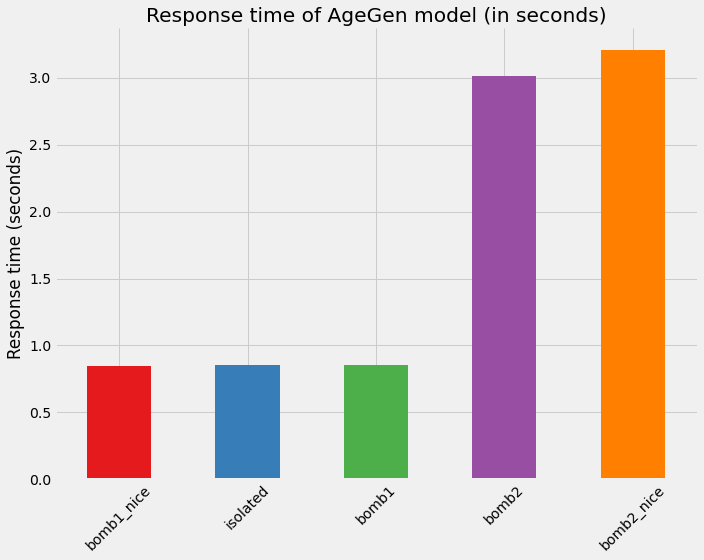

In [94]:
colors = plt.cm.get_cmap('Set1')

ax = temp_df.plot(
    kind='bar', 
    x='index', 
    y='time',
    xlabel='',
    ylabel='Response time (seconds)',
    grid=True,
    legend=False,
    figsize=(10,8),
    title='Response time of AgeGen model (in seconds)',
    rot=45,
    color=colors(range(len(temp_df))),
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

# ResNet50

In [95]:
files = os.path.join(f'{ROOT_FOLDER}{os.sep}csv', "resnet*")
files = glob.glob(files)
files

['/home/root/AgeTest/csv/resnet50.xmodel_bomb1_nice.csv',
 '/home/root/AgeTest/csv/resnet50.xmodel_bomb1.csv',
 '/home/root/AgeTest/csv/resnet50.xmodel.csv',
 '/home/root/AgeTest/csv/resnet50.xmodel_bomb2_nice.csv',
 '/home/root/AgeTest/csv/resnet50.xmodel_bomb2.csv']

In [96]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])

In [97]:
merged_df = pd.merge(df1, df2, on='img')
merged_df = pd.merge(merged_df, df3, on='img')
merged_df = pd.merge(merged_df, df4, on='img')
merged_df = pd.merge(merged_df, df5, on='img')

In [98]:
merged_df.to_csv(f'/{ROOT_FOLDER}/resnet50_merged.csv')
merged_df.head()

,img,time_bomb1_nice,time_bomb1,time,time_bomb2_nice,time_bomb2
0,031940_3M53.JPG,0.002359,0.002345,0.002344,0.063390,0.002368
1,027529_01M62.JPG,0.002278,0.002266,0.002272,0.040700,0.002308
2,035285_2M53.JPG,0.002250,0.002254,0.002256,0.039745,0.005629
3,034280_00M56.JPG,0.002228,0.002221,0.002225,0.031873,0.031850
4,035735_04M58.JPG,0.002219,0.002215,0.002216,0.019890,0.023884


In [99]:
temp_df = merged_df.loc[:, merged_df.columns!='img'].sum(axis=0).to_frame().reset_index()
temp_df = temp_df.rename(columns={'index': 'index', 0: 'time'})
temp_df = temp_df.sort_values(by='time')
temp_df['index'] = temp_df['index'].replace(['time'], 'isolated')
temp_df['index'] = temp_df['index'].apply(lambda x: x.replace('time_', ''))
temp_df.head()

,index,time
1,bomb1,0.221112
0,bomb1_nice,0.221572
2,isolated,0.221622
4,bomb2,2.427066
3,bomb2_nice,2.469812


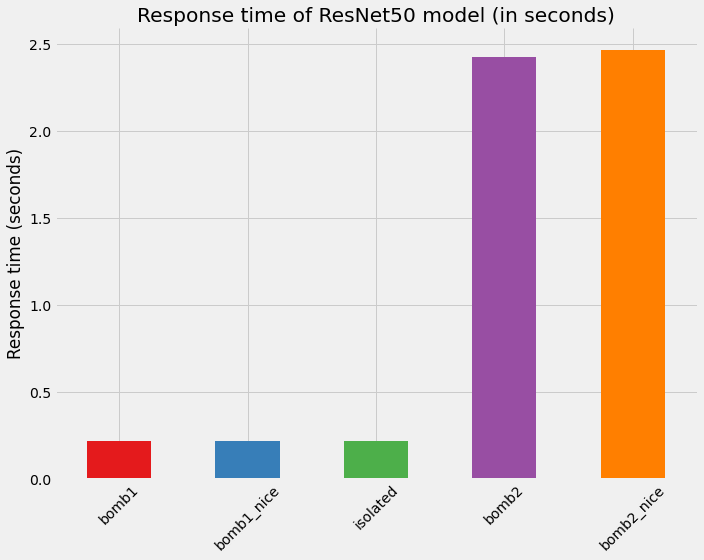

In [100]:
colors = plt.cm.get_cmap('Set1')

ax = temp_df.plot(
    kind='bar', 
    x='index', 
    y='time',
    xlabel='',
    ylabel='Response time (seconds)',
    grid=True,
    legend=False,
    figsize=(10,8),
    title='Response time of ResNet50 model (in seconds)',
    rot=45,
    color=colors(range(len(temp_df))),
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

In [ ]:
#import libxperfmon
#import os
#from time import sleep

#def get_pfm_name():
#    pfms = {
#        'vcap_csi'  : 'preset_pfm1',
#        'vcap_gmsl' : 'preset_pfm2',
#        'vcap_hdmi' : 'preset_pfm3'
#    }
#    for p in pfms:
#        if os.path.exists("/sys/firmware/devicetree/base/amba_pl@0/" + p) == True:
#            return pfms[p]

In [ ]:
#get_pfm_name()

In [ ]:
#getattr(libxperfmon,get_pfm_name())

In [ ]:
#apm = libxperfmon.APM(getattr(libxperfmon,get_pfm_name()))
#while True:
#    print([apm.port[i].getThroughput(libxperfmon.Gbps) for i in range(2)])
#    sleep(.5)